[[ 3.19061355  0.09760657]
 [ 1.11818478 -0.41668964]
 [ 0.66027022 -0.07932652]
 [ 0.89866279 -0.14020161]
 [ 0.94633392 -0.1067092 ]
 [-0.60914912  0.19780758]
 [ 2.07938975  0.38227216]
 [ 1.06127845 -0.09048862]
 [ 0.3320732  -0.34580284]
 [ 2.20314948 -0.24620621]
 [-0.45137966 -0.04598472]
 [ 2.82015258  0.05293137]
 [-0.2538756  -0.15943013]
 [ 1.76576557 -0.03589188]
 [ 0.05837162 -0.05143643]
 [ 1.91250384  0.4418718 ]
 [-0.52373367 -0.14007108]
 [ 0.0155916  -0.54092344]
 [-0.13140954 -0.22894558]
 [ 2.37658624 -0.02949692]]
[[-0.98811052  2.14460103]
 [ 0.56365921  1.61022181]
 [ 0.26925641  1.8683863 ]
 [-0.07028286  2.00664421]
 [-1.75354217  1.94012663]
 [ 2.24089122  2.19069139]
 [ 2.35724696  2.25030336]
 [ 2.82186082  1.74994037]
 [ 2.03593013  1.58389245]
 [ 0.26161956  1.57191104]
 [ 2.28371329  2.29823284]
 [ 0.75821738  2.39682269]
 [ 0.17363094  2.03367895]
 [ 1.18731947  1.7620387 ]
 [ 1.53637287  2.43356876]
 [-0.25527883  2.20109819]
 [ 0.81076853  2.39570069]


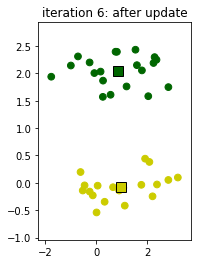

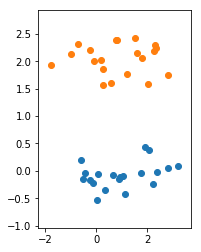

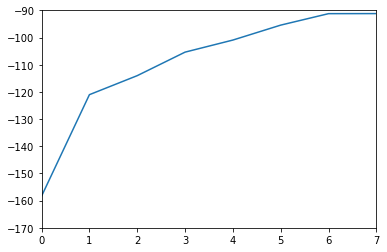

[[ 3.19061355  0.09760657]
 [ 1.11818478 -0.41668964]
 [ 0.66027022 -0.07932652]
 [ 0.89866279 -0.14020161]
 [ 0.94633392 -0.1067092 ]
 [-0.60914912  0.19780758]
 [ 2.07938975  0.38227216]
 [ 1.06127845 -0.09048862]
 [ 0.3320732  -0.34580284]
 [ 2.20314948 -0.24620621]
 [-0.45137966 -0.04598472]
 [ 2.82015258  0.05293137]
 [-0.2538756  -0.15943013]
 [ 1.76576557 -0.03589188]
 [ 0.05837162 -0.05143643]
 [ 1.91250384  0.4418718 ]
 [-0.52373367 -0.14007108]
 [ 0.0155916  -0.54092344]
 [-0.13140954 -0.22894558]
 [ 2.37658624 -0.02949692]]
[[-0.98811052  2.14460103]
 [ 0.56365921  1.61022181]
 [ 0.26925641  1.8683863 ]
 [-0.07028286  2.00664421]
 [-1.75354217  1.94012663]
 [ 2.24089122  2.19069139]
 [ 2.35724696  2.25030336]
 [ 2.82186082  1.74994037]
 [ 2.03593013  1.58389245]
 [ 0.26161956  1.57191104]
 [ 2.28371329  2.29823284]
 [ 0.75821738  2.39682269]
 [ 0.17363094  2.03367895]
 [ 1.18731947  1.7620387 ]
 [ 1.53637287  2.43356876]
 [-0.25527883  2.20109819]
 [ 0.81076853  2.39570069]


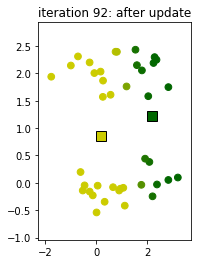

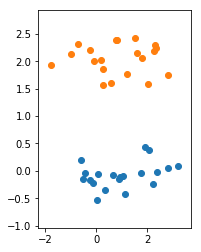

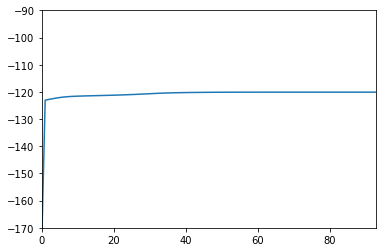

In [7]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from math import sqrt, pi
from matplotlib.widgets import Slider, Button
np.random.seed(3)

colors = ["#cccc00", "#006600", "m", "b", "r"]

def EM(data, K, m, n_iter = 25, return_all_iterations=False, random_choice=True):
    N, M = data.shape # assume: N is number of data points, M is each data point's dimens

    sigma_def = 3
    likeli = []
    #random initialization
    if random_choice == True:
        for mm in range(M):
            m[:, mm] = np.random.uniform(np.min(data[:,mm]), np.max(data[:,mm]), (K, ))
    Sigma = [sigma_def*np.eye(M) for kk in range(K)]
    gamma = 1/K*np.ones((N,K), dtype=np.int32)
    p = 1/K*np.ones((K,))
    gamma_old = None
    
      
    # if we want to get back all parameters for each single iteration    
    if return_all_iterations:
        Sigma_history = [[np.copy(Sigma[k]) for k in range(K)]]
        m_history = np.zeros((1, K, M))
        m_history[0, :, :] = m
        gamma_history = np.zeros((1, N, K))
        gamma_history[0, :, :] = gamma
        p_history = np.zeros((1,K))
        p_history[0, :] = p
    # if we are only interested in the final clustering result        
    else:
        m_history = None
        Sigma_history = None
        gamma_history = None
        p_history = None
    
    likeli_new = 0
    for n in range(N):
        x = data[n, :]
        terms = np.array([p[k]*1/sqrt((2*pi)**M*np.linalg.det(Sigma[k])) * np.exp(-0.5*(x-m[k,:]) @ (np.linalg.inv(Sigma[k]) @ (x-m[k,:]))) for k in range(K)])
        likeli_new = likeli_new + np.log(np.sum(terms))
    
    #print(likeli_new) 
    for it in range(n_iter):
        likeli.append(likeli_new) 
        # assignment step
        for n in range(N):
            x = data[n, :]
            terms = np.array([p[k]*1/sqrt((2*pi)**M*np.linalg.det(Sigma[k])) * np.exp(-0.5*(x-m[k,:]) @ (np.linalg.inv(Sigma[k]) @ (x-m[k,:]))) for k in range(K)])
            gamma[n, :] = terms/np.sum(terms)
        
        
            
        if return_all_iterations:
            gamma_history = np.append(gamma_history, [gamma], 0)
        

        # update step
        means = np.dot(gamma.T, data)
        Nk = [np.sum(gamma[:, k]) for k in range(K)]
        m_new = np.array([ means[k, :]/Nk[k] for k in range(K)])
        
        # if we haven't moved a lot, break the loop and stick with current clustering
        #if np.sum(np.sum((m-m_new)*(m-m_new))) < 10**-8:
            #break
        
        m = m_new
        
        Sigma_new = [np.zeros((M, M)) for k in range(K)]
        for k in range(K):
            Sigmak = np.zeros((M,M))
            for n in range(N):
                x = data[n, :]
                Sigmak += gamma[n, k] * np.dot((x-m[k,:]).reshape((-1,1)), (x-m[k,:]).reshape((1,-1)))
            Sigma_new[k] = Sigmak/Nk[k]
            if np.linalg.det(Sigma_new[k]) < 1e-10:
                print("Covariance singularity!")
                return {"success": False, "m": m, "Sigma": Sigma, "p": p, "gamma": gamma, "m_history": m_history, "Sigma_history": Sigma_history, "p_history": p_history, "gamma_history": gamma_history, 'likelihood':likeli} # return a dictionary 
        
        Sigma = [np.copy(Sigma_new[k]) for k in range(K)]

        p = np.array([Nk[k]/N for k in range(K)])

        
        if return_all_iterations:
            m_history = np.append(m_history, [m], 0)
            Sigma_history.append([np.copy(Sigma_new[k]) for k in range(K)])
            p_history = np.append(p_history, [p], 0)
        likeli_old = likeli_new
        likeli_new = 0
        for n in range(N):
            x = data[n, :]
            terms = np.array([p[k]*1/sqrt((2*pi)**M*np.linalg.det(Sigma[k])) * np.exp(-0.5*(x-m[k,:]) @ (np.linalg.inv(Sigma[k]) @ (x-m[k,:]))) for k in range(K)])
            likeli_new = likeli_new + np.log(np.sum(terms))
        
        #print(likeli_new)
        if likeli_new > 10**8:
            print("Error")
            return {"success": False, "m": m, "Sigma": Sigma, "p": p, "gamma": gamma, "m_history": m_history, "Sigma_history": Sigma_history, "p_history": p_history, "gamma_history": gamma_history, 'likelihood':likeli} # return a dictionary 
        if likeli_new - likeli_old < 10**-8:
            break
    return {"success": True, "m": m, "Sigma": Sigma, "p": p, "gamma": gamma, "m_history": m_history, "Sigma_history": Sigma_history, "p_history": p_history, "gamma_history": gamma_history, 'likelihood':likeli} # return a dictionary 


# matplotlib ellipse plotter (from matplotlib.org)


def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)


def plot_ellipse(mean, cov, ax, n_std=1.0, color='k', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of `x` and `y`

    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    Returns
    -------
    matplotlib.patches.Ellipse

    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """

    #cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        color=color, alpha = 0.05,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean[0], mean[1])
    

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)


if __name__ == "__main__":
    # Test cases. Fiddle with parameters:
    n_iter = 100
    K = 2 # number of clusters
    
    option = 9 # select scenario 
    
    # description of options:
    # option 1: three clusters with few points
    # option 2: two elongated clusters
    # option 3: one large, one small cluster
    # option 4: small, dense cluster within large cluster
    # option 5: two ring-shaped clusters
    # option 6: faithful.csv
    
    

    # END parameters TODO: plot, von welcher normalverteilung Daten ursprünglich erstellt
    
    if option == 1:
        mean1 = np.array([1,0])
        sig1 = 0.05*np.eye(2)
        mean2 = np.array([0, 1])
        sig2 = 0.05*np.eye(2)
        mean3 = np.array([2, 1])
        sig3 = 0.05*np.eye(2)
        first = np.random.multivariate_normal(mean1, sig1, 5)
        second = np.random.multivariate_normal(mean2, sig2, 5)
        third = np.random.multivariate_normal(mean3, sig3, 5)
        data = np.concatenate((first, second, third))
        m = np.zeros((K, data.shape[1]))
        choice = True
    elif option == 2:
        mean1 = np.array([1,0])
        sig1 = np.diag([1.5, 0.05])
        mean2 = np.array([1, 2])
        sig2 = np.diag([1.5, 0.05])
        data = np.concatenate((np.random.multivariate_normal(mean1, sig1, 25), np.random.multivariate_normal(mean2, sig2, 25)))
        m = np.zeros((K, data.shape[1]))
        choice = True
    elif option == 3:
        mean1 = np.array([4, 5])
        sig1 = np.diag([0.5, 3])
        mean2 = np.array([7, 5])
        sig2 = np.diag([0.2, 0.2])
        data = np.concatenate((np.random.multivariate_normal(mean1, sig1, 50), np.random.multivariate_normal(mean2, sig2, 10))) 
        m = np.zeros((K, data.shape[1]))
        choice = True
    elif option == 4:
        mean1 = np.array([1, 1])
        sig1 = np.diag([4, 4])
        mean2 = np.array([3.5, 1])
        sig2 = np.diag([0.01, 0.01])
        data = np.concatenate((np.random.multivariate_normal(mean1, sig1, 50), np.random.multivariate_normal(mean2, sig2, 50)))
        m = np.zeros((K, data.shape[1]))
        choice = True
    elif option == 5:
        data1 = np.random.normal(0, 1, (40,2))
        norms1 = np.tile(np.sqrt(data1[:,0]**2 + data1[:, 1]**2), (2, 1)).T
        data1 = data1/(norms1) + np.random.normal(0, 0.05, (40,2))        
        data2 = np.random.normal(0, 1, (40,2))
        norms2 = np.tile(np.sqrt(data2[:,0]**2 + data2[:, 1]**2), (2, 1)).T
        data2 = data2/(0.3*norms2) + np.random.normal(0, 0.05, (40,2))
        data = np.concatenate((data1, data2))
        m = np.zeros((K, data.shape[1]))
        choice = True
    elif option == 7: #singularity
        mean1 = np.array([1,0])
        sig1 = np.diag([0.5, 0.5])
        mean2 = np.array([1, 2])
        sig2 = np.diag([0.005, 0.005])
        first = np.random.multivariate_normal(mean1, sig1, 2)
        second = np.random.multivariate_normal(mean2, sig2, 10)
        data = np.concatenate((first, second))
        m = np.zeros((K, data.shape[1]))
        choice = True
        
    elif option == 8: #maybe not a global maximum
        data1 = np.random.normal(0, 1, (40,2))
        norms1 = np.tile(np.sqrt(data1[:,0]**2 + data1[:, 1]**2), (2, 1)).T
        first = data1/(norms1) + np.random.normal(0, 0.05, (40,2))        
        data2 = np.random.normal(0, 1, (40,2))
        norms2 = np.tile(np.sqrt(data2[:,0]**2 + data2[:, 1]**2), (2, 1)).T
        second = data2/(0.3*norms2) + np.random.normal(0, 0.05, (40,2))
        data = np.concatenate((first, second))
        m1 = np.zeros((K, data.shape[1]))
        choice = False
        m1[0,0] = 0
        m1[0,1] = -2
        m1[1,0] = 0
        m1[1,1] = 2
        m2 = np.zeros((K, data.shape[1]))
        m2[0,0] = 0
        m2[0,1] = 0
        m2[1,0] = 2
        m2[1,1] = -2
    elif option == 9: #no global maximum
        mean1 = np.array([1,0])
        sig1 = np.diag([1.5, 0.05])
        mean2 = np.array([1, 2])
        sig2 = np.diag([1.5, 0.05])
        first = np.random.multivariate_normal(mean1, sig1, 20)
        second = np.random.multivariate_normal(mean2, sig2, 20)
        data = np.concatenate((first, second))
        m = np.zeros((K, data.shape[1]))
        m1 = np.zeros((K, data.shape[1]))
        choice = False
        m1[0,0] = 0
        m1[0,1] = -2
        m1[1,0] = 0
        m1[1,1] = 2
        m2 = np.zeros((K, data.shape[1]))
        m2[0,0] = -2
        m2[0,1] = -1
        m2[1,0] = 2
        m2[1,1] = -1
    elif option == 10:
        mean1 = np.array([-1,-2])
        sig1 = np.diag([1.5, 0.05])
        mean2 = np.array([1, 2])
        sig2 = np.diag([1.5, 0.05])
        first = np.random.multivariate_normal(mean1, sig1, 20)
        second = np.random.multivariate_normal(mean2, sig2, 20)
        data = np.concatenate((first, second))
        m = np.zeros((K, data.shape[1]))
        m1 = np.zeros((K, data.shape[1]))
        choice = False
        m1[0,0] = -2
        m1[0,1] = 2
        m1[1,0] = 4
        m1[1,1] = -4
        m2 = np.zeros((K, data.shape[1]))
        m2[0,0] = -2
        m2[0,1] = 2
        m2[1,0] = 2
        m2[1,1] = 2
    # find bounding box of data (for plotting purposes)
    xmin = np.min(data[:, 0])
    xmax = np.max(data[:, 0])
    ymin = np.min(data[:, 1])
    ymax = np.max(data[:, 1])
    dmin = min(xmin, ymin)
    dmax = max(xmax, ymax)
    
    #data = np.concatenate((np.random.normal(0, 0.05, (10,)), np.random.normal(1, 0.05, (10,)))).reshape((-1,1))
    
    
    
    
    
    def drawfig(it, m, m_history, n_iter, Sigma, Sigma_history, p, p_history, gamma, gamma_history):
        plt.figure()
        #ax1 = plt.subplot(1,2,1)
        ax2 = plt.subplot(1,2,2)
        #ax1.set_xlim([xmin-0.5, xmax+0.5])
        #ax1.set_ylim([ymin-0.5, ymax+0.5])
        m_now = m_history[it+1, :, :]
        m_old = m_history[it, :, :]
        
        gamma_now = gamma_history[it+1, :]
        Sigma_now = Sigma_history[it+1]
        Sigma_old = Sigma_history[it]

        
        #for k in range(K):
            #ax1.plot(m_old[k, 0], m_old[k, 1], color = colors[k], marker = "s", markeredgecolor="k", markersize=10)
        
        
        
        #if K == 2: # linear interpolation between colors possible
            #mixcoeffs = gamma_now[:, 1]
            #sc = ax1.scatter(data[:, 0], data[:, 1], c=[colorFader(colors[0],colors[1],mixc) for mixc in mixcoeffs], s=45, zorder=2)
            
        #else: # for more clusters we can only color with the dominant cluster :(
            #cs_index = [int(list(gamma_now[n, :]).index(max(gamma_now[n, :]))) for n in range(N)]
            #ax1.scatter(data[:, 0], data[:, 1], c=[colors[csi] for csi in cs_index], s=45, zorder=2)
            
        #for k in range(K):
            #plot_ellipse(m_old[k, :], Sigma_old[k], ax1)
            #plot_ellipse(m_old[k, :], Sigma_old[k], ax1, n_std=2.0)
        

        
        
        ax2.set_xlim([xmin-0.5, xmax+0.5])
        ax2.set_ylim([ymin-0.5, ymax+0.5])
        
        for k in range(K):
            ax2.plot(m_now[k, 0], m_now[k, 1], color = colors[k], marker = "s", markeredgecolor="k", markersize=10)
                        
                        
                        
                            
        if K == 2: # linear interpolation between colors possible
            mixcoeffs = gamma_now[:, 1]
            sc = ax2.scatter(data[:, 0], data[:, 1], c=[colorFader(colors[0],colors[1],mixc) for mixc in mixcoeffs], s=45, zorder=2)
            
        else: # for more clusters we can only color with the dominant cluster :(
            cs_index = [int(list(gamma_now[n, :]).index(max(gamma_now[n, :]))) for n in range(N)]
            ax2.scatter(data[:, 0], data[:, 1], c=[colors[csi] for csi in cs_index], s=45, zorder=2)
        #for k in range(K):
            #plot_ellipse(m_now[k, :], Sigma_now[k], ax2)
            #plot_ellipse(m_now[k, :], Sigma_now[k], ax2, n_std=2.0)
        
        #ax1.set_title("iteration " + str(it) + ": after assignment")
        ax2.set_title("iteration " + str(it) + ": after update")
        #plt.title("iteration " + str(it) + ": after update")
        # ax1.set_aspect('equal')
        # ax2.set_aspect('equal')
        plt.show()
    
    def plotting(ret, just):
        #if ret["success"] == True:
        m = ret["m"]
        m_history = ret["m_history"]
    
        n_iter = m_history.shape[0] - 1
    
        Sigma = ret["Sigma"]
        Sigma_history = ret["Sigma_history"]
        p = ret["p"]
        p_history = ret["p_history"]
        gamma = ret["gamma"]
        gamma_history = ret["gamma_history"]
        likelihood = ret['likelihood']
        print(first)
        print(second)
        #print(m_history)
        #print(Sigma_history)
        #print(likelihood)
            
        plt.ion()
        #if ret["success"] == True:
        if just_last == True:
            drawfig(m_history.shape[0]-3, m, m_history, n_iter, Sigma, Sigma_history, p, p_history, gamma, gamma_history)
            #initial      
            plt.figure()
            ax1 = plt.subplot(1,2,1)
            ax1.set_xlim([xmin-0.5, xmax+0.5])
            ax1.set_ylim([ymin-0.5, ymax+0.5])
            ax1.scatter(first[:, 0], first[:, 1])
            ax1.scatter(second[:, 0], second[:, 1])
            if option == 1:
                ax1.scatter(third[:, 0], third[:, 1])
            #ax1.set_title("initial clusters")
            plt.show()
    
            #likelihood
            plt.figure()
            ax1 = plt.subplot(1,1,1)
            ax1.set_xlim([0, len(likelihood)-1])
            ax1.set_ylim([-170, -90])#[min(likelihood)-1, max(likelihood)+1])
            plt.plot(likelihood)
            #ax1.set_title("values of loglikelihood")
            plt.show()
        else:
            for it in range(m_history.shape[0]-2):
                drawfig(it, m, m_history, n_iter, Sigma, Sigma_history, p, p_history, gamma, gamma_history)
                #initial      
                plt.figure()
                ax1 = plt.subplot(1,2,1)
                ax1.set_xlim([xmin-0.5, xmax+0.5])
                ax1.set_ylim([ymin-0.5, ymax+0.5])
                ax1.scatter(first[:, 0], first[:, 1])
                ax1.scatter(second[:, 0], second[:, 1])
                if option == 1:
                    ax1.scatter(third[:, 0], third[:, 1])
                ax1.set_title("initial clusters")
                plt.show()

                #likelihood
                plt.figure()
                ax1 = plt.subplot(1,1,1)
                ax1.set_xlim([0, len(likelihood)-1])
                ax1.set_ylim([min(likelihood)-1, max(likelihood)+1])
                plt.plot(likelihood)
                ax1.set_title("values of loglikelihood")
                plt.show()
    N, M = data.shape
    just_last = True #parameter, if we only want to draw last
    if option == 8 or option == 9 or option == 10:
        ret1 = EM(data, K, m1, n_iter = n_iter, return_all_iterations=True, random_choice=choice)
        plotting(ret1, just_last)
        ret2 = EM(data, K, m2, n_iter = n_iter, return_all_iterations=True, random_choice=choice)
        plotting(ret2, just_last)
    else:
        ret = EM(data, K, m, n_iter = n_iter, return_all_iterations=True, random_choice=choice)
        plotting(ret, just_last)
    
  
